In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.utils import resample


# Лабораторная работа 5.
Критерии качества. Кривая ошибок. Оценивание качества.
## Задание.
1. Подобрать таблицу данных с несбалансированными классами. Решить задачу классификации любым подходящим методом.
2. Вычислить точность, полноту, специфичность.
3. Построить кривую ошибок и найти площадь под ней. Построить для сравнения кривую "точность-полнота".
4. Разбить данные на обучающую и контрольную выборки. Построить ROC- кривую для каждой из подвыборок. Построить ROC- кривую на основе кроссвалидации.
5. Исследовать влияние выбора критерия обучения на AUC. Один из критериев — log loss, ещё один или два — на выбор. Как вариант: сравнить AdaBoost с градиентным бустингом.



Time: Это количество секунд, прошедших между данной транзакцией и первой транзакцией в наборе данных. Обычно это начинается с 0.

V1, V2, V3, ... V28: Это анонимизированные признаки, полученные после процесса главных компонент (PCA), который был применен к оригинальным данным для обеспечения конфиденциальности клиентов. Эти признаки содержат числовые значения и представляют собой результат анализа данных транзакций. По сути, это числовые характеристики, созданные на основе оригинальных данных, но без конкретной идентифицирующей информации.

Amount: Это сумма транзакции.

Class: Это целевая переменная, которая указывает, является ли транзакция мошеннической или нет. Значение 0 обозначает нормальную транзакцию, а значение 1 обозначает мошенническую транзакцию.

Class
0    2000
1     492
Name: count, dtype: int64


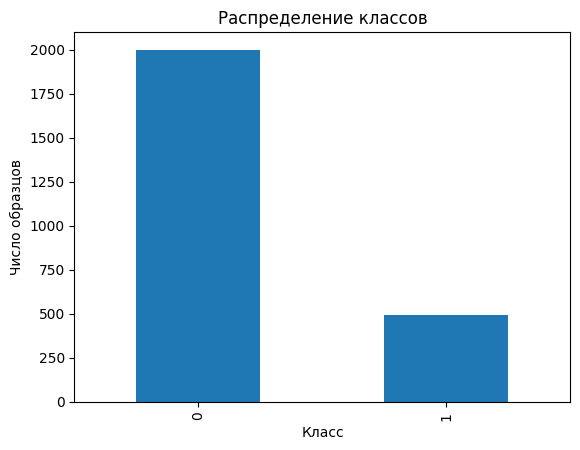

In [11]:
# Загрузка датасета
data = pd.read_csv("creditcard.csv")

# Разделите данные на два класса: нормальные транзакции (Class 0) и мошеннические транзакции (Class 1)
normal_transactions = data[data["Class"] == 0]
fraud_transactions = data[data["Class"] == 1]

normal_downsampled = resample(normal_transactions, n_samples=2000, random_state=42)

# Объедините сокращенные нормальные транзакции и все мошеннические транзакции
small_data = pd.concat([normal_downsampled, fraud_transactions])

# Проверьте распределение классов
class_distribution = small_data['Class'].value_counts()
print(class_distribution)
# print(data)

class_distribution.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Число образцов')
plt.show()

In [12]:
# Разделим данные на признаки (X) и целевую переменную (y)
X = small_data.drop("Class", axis=1)
y = small_data["Class"]

# Разделите данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(class_weight='balanced', random_state=42, kernel='linear') # probability=True,
svm_model.fit(X_train, y_train)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(class_weight='balanced', kernel='linear', random_state=42)

# 2

In [13]:
y_pred = svm_model.predict(X_test)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [14]:
# матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

TN = conf_matrix[0, 0]  # TN
FP = conf_matrix[0, 1]  # FP
FN = conf_matrix[1, 0]  # FN
TP = conf_matrix[1, 1]  # TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

accuracy = (TP + TN) / (TP + FP + TN + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision) # оценивает, насколько предсказания положительного класса модели являются точными и не содержат ложных положительных предсказаний.
print("Recall:", recall) # оценивает, насколько много положительных случаев модель способна обнаруживать и не упускать.
print("Specificity:", specificity) # измеряет способность модели правильно классифицировать негативные образцы
# print("-------------------")
# print("Accuracy:", accuracy) # показывает долю правильных предсказаний относительно общего числа предсказаний
# print("F1 Score:", f1)

Precision: 0.9431818181818182
Recall: 0.8556701030927835
Specificity: 0.9875621890547264


# 3

Кривая работы приёмника и оператора (ROC-кривая) - это графическая метрика, используемая для оценки производительности модели классификации, особенно в контексте бинарной классификации (где есть два класса: положительный и отрицательный). ROC-кривая отображает отношение между чувствительностью (Recall) и специфичностью (Specificity) модели при различных порогах классификации.

Вот что показывает ROC-кривая:

Чувствительность (Recall) на оси y: Отображает способность модели обнаруживать положительные случаи. Чем выше точка на ROC-кривой, тем выше чувствительность модели при данном пороге.

1 - Специфичность на оси x: Отображает способность модели избегать ложных срабатываний при классификации отрицательных случаев. Чем ближе точка к левому верхнему углу ROC-кривой, тем выше специфичность модели.

ROC-кривая предоставляет информацию о производительности модели при различных порогах классификации. Идеальная ROC-кривая была бы диагональной линией от левого нижнего угла к правому верхнему углу (где чувствительность и специфичность равны 1), но на практике это редко бывает.

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


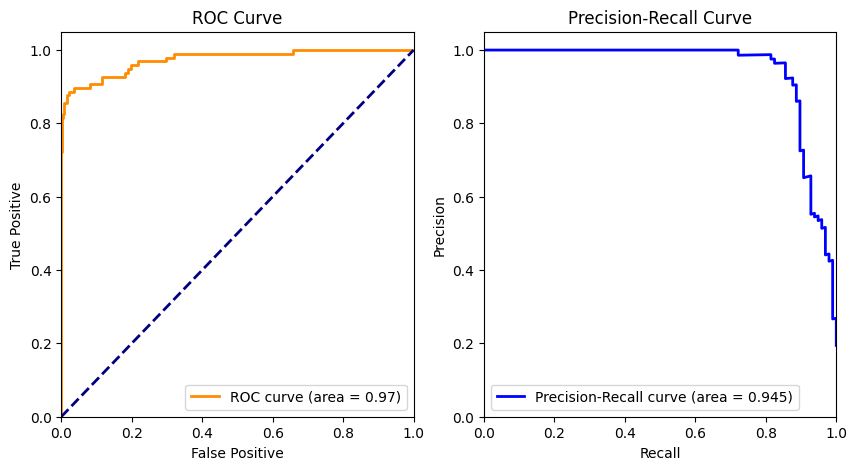

AUC-ROC: 0.9740216443555418
AUC Precision-Recall: 0.9451852236374668


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# вероятности принадлежности классу 1 (мошенническая транзакция)
y_scores = svm_model.decision_function(X_test)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Кривая "точность-полнота"
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Постройте ROC-кривую
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Постройте кривую "точность-полнота"
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.3f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()

print("AUC-ROC:", roc_auc)
print("AUC Precision-Recall:", pr_auc)

# 4

In [16]:
# Разделите данные на обучающую и контрольную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создайте модель SVM (можете настроить гиперпараметры)
svm_model = SVC(probability=True, kernel='linear', class_weight='balanced', random_state=42)

# Обучите модель на обучающей выборке
svm_model.fit(X_train, y_train)

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [17]:
from sklearn.model_selection import cross_val_predict

# strativfiledFold
# Получите вероятности принадлежности классу 1 для контрольной выборки
y_scores = svm_model.decision_function(X_test)

# Постройте ROC-кривую для контрольной выборки
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Получите оценки решающей функции при кросс-валидации
y_scores_cv = cross_val_predict(svm_model, X, y, cv=4, method='decision_function')

# Постройте ROC-кривую на основе кросс-валидации
fpr_cv, tpr_cv, _ = roc_curve(y, y_scores_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Визуализация ROC-кривых
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validation)')
plt.legend(loc='lower right')

plt.show()

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: